#### 보스턴 집값 예측

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
dir (boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns =['MEDV'])

In [6]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

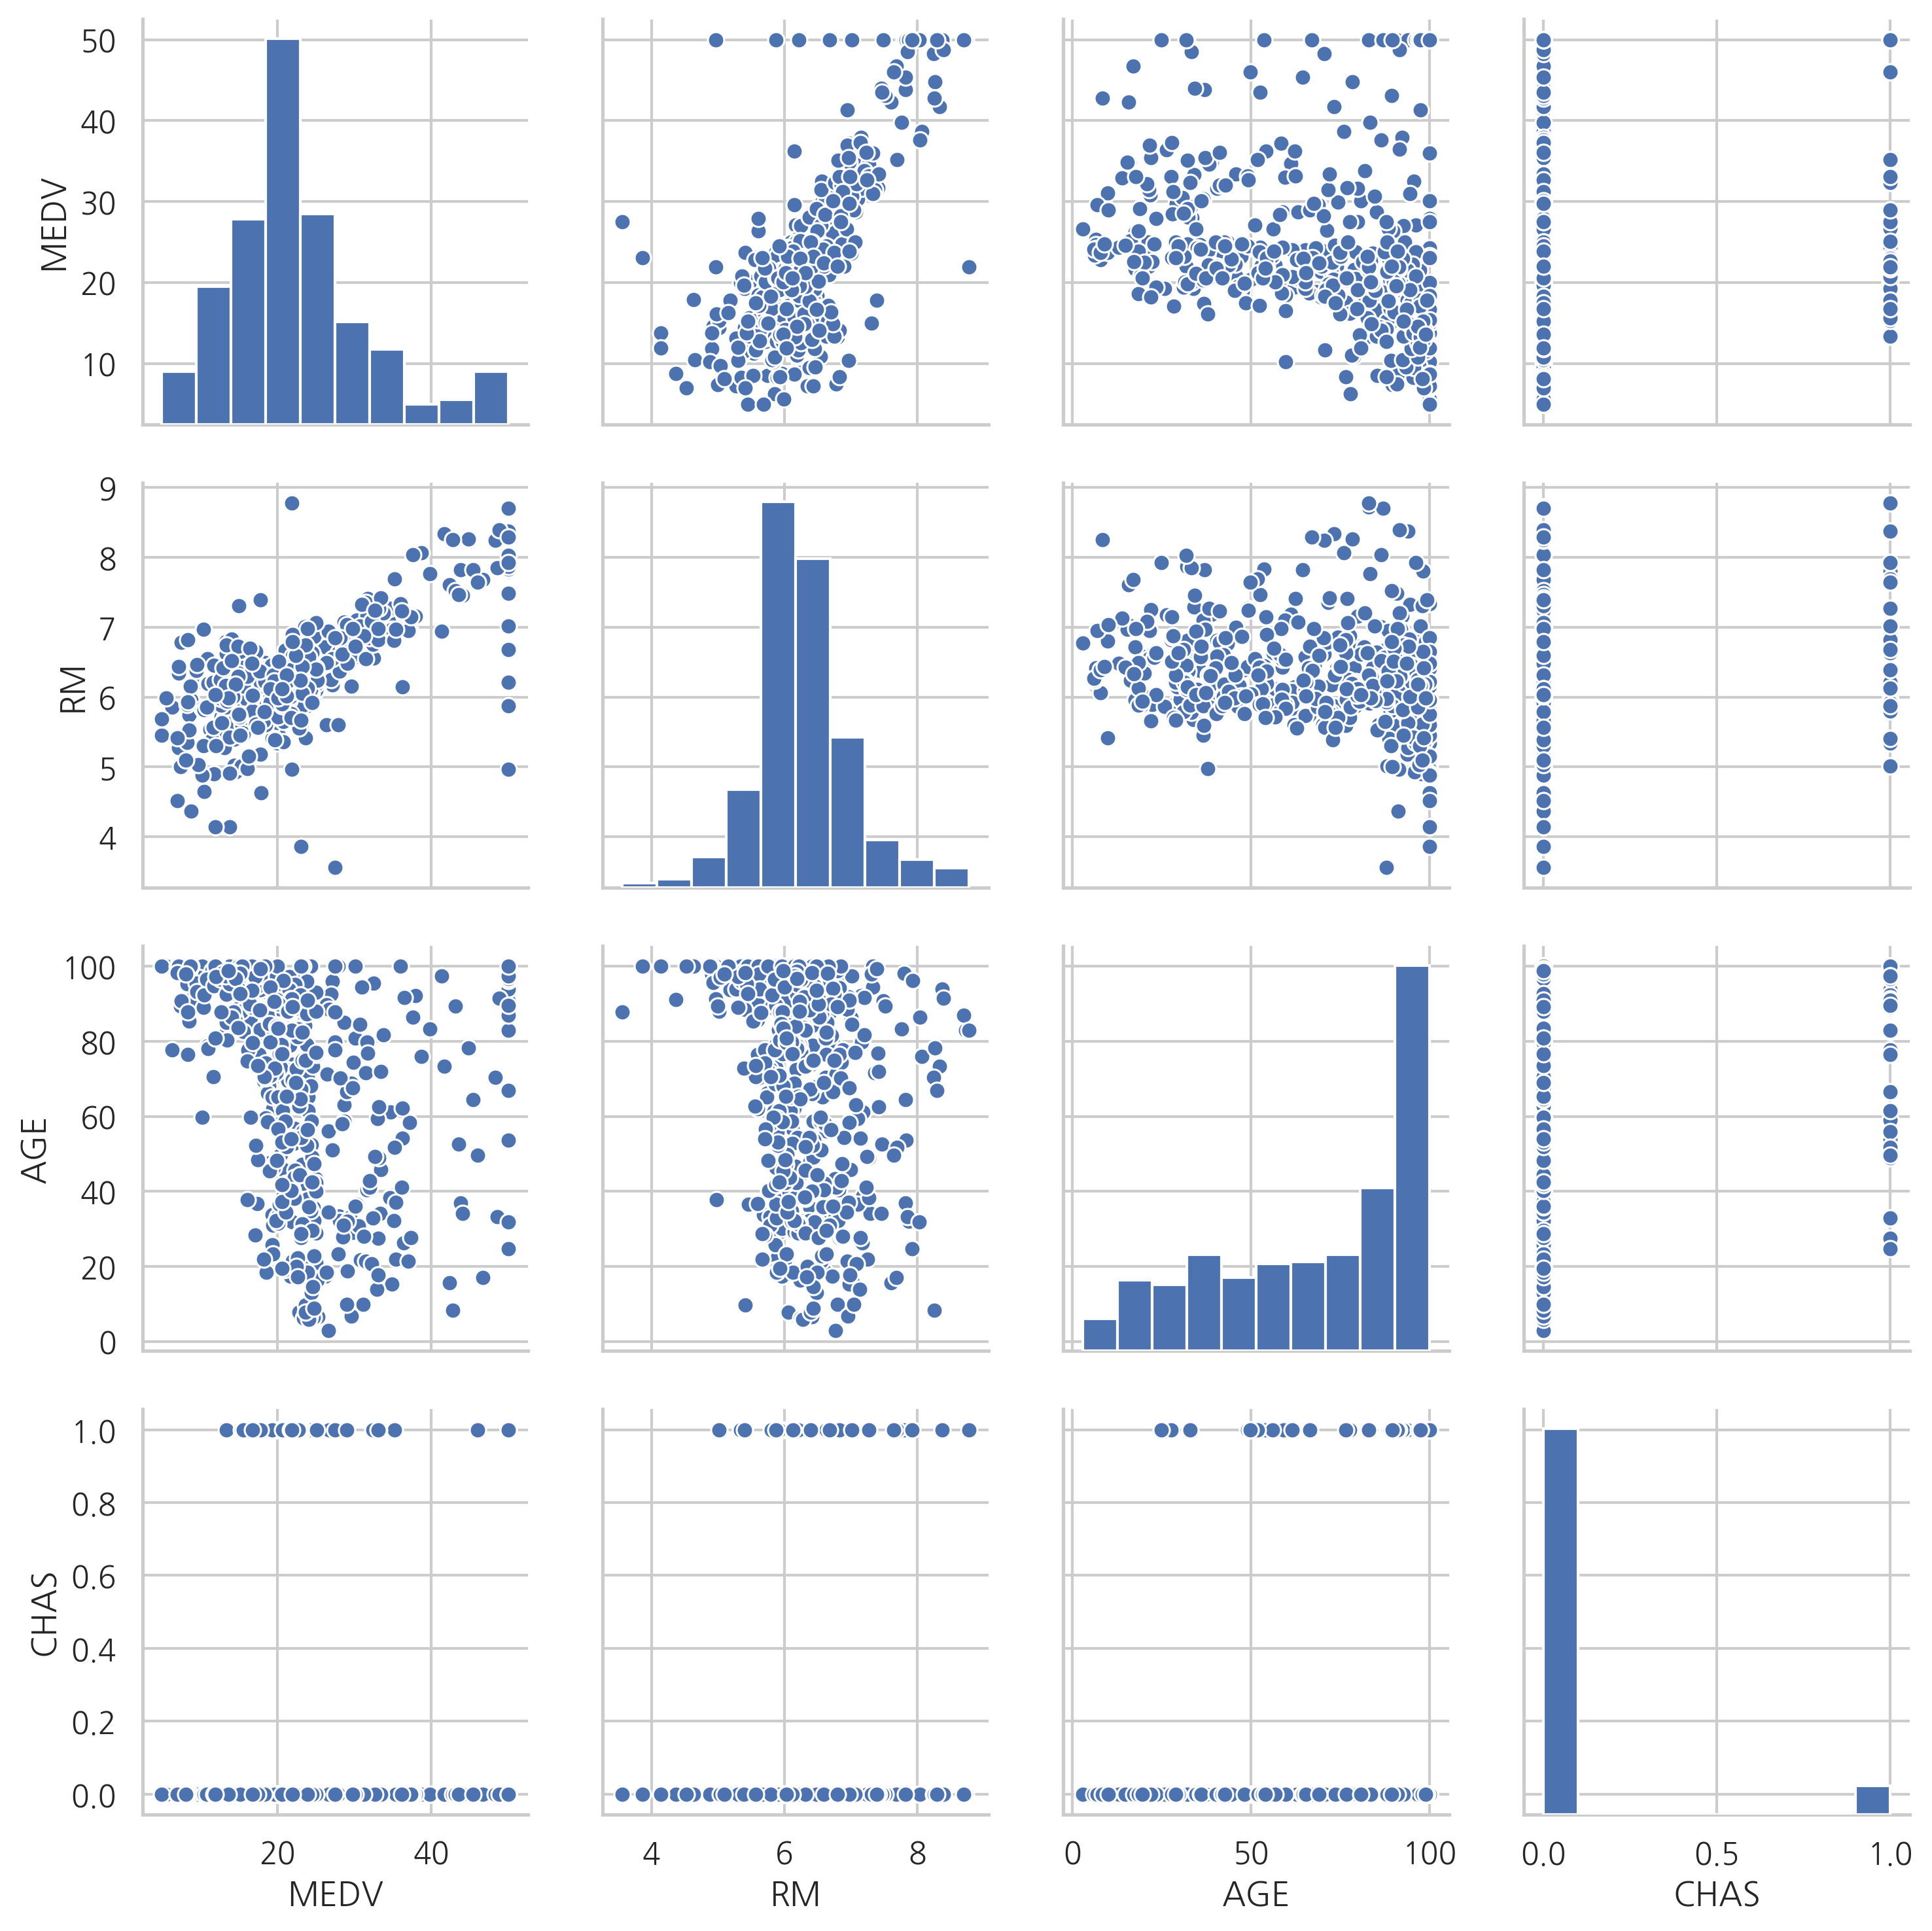

In [7]:
sns.pairplot(df[['MEDV', 'RM', 'AGE', 'CHAS']])
plt.show()

- 방의 개수와 집값은 상관관계가 있다
- 노후된 정도와 집값은 상관관계가 없다
- chas=1 인경우 집값의 평균이 높아진다?

#### 당뇨병 진행도 예측

In [8]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.tail()

age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0

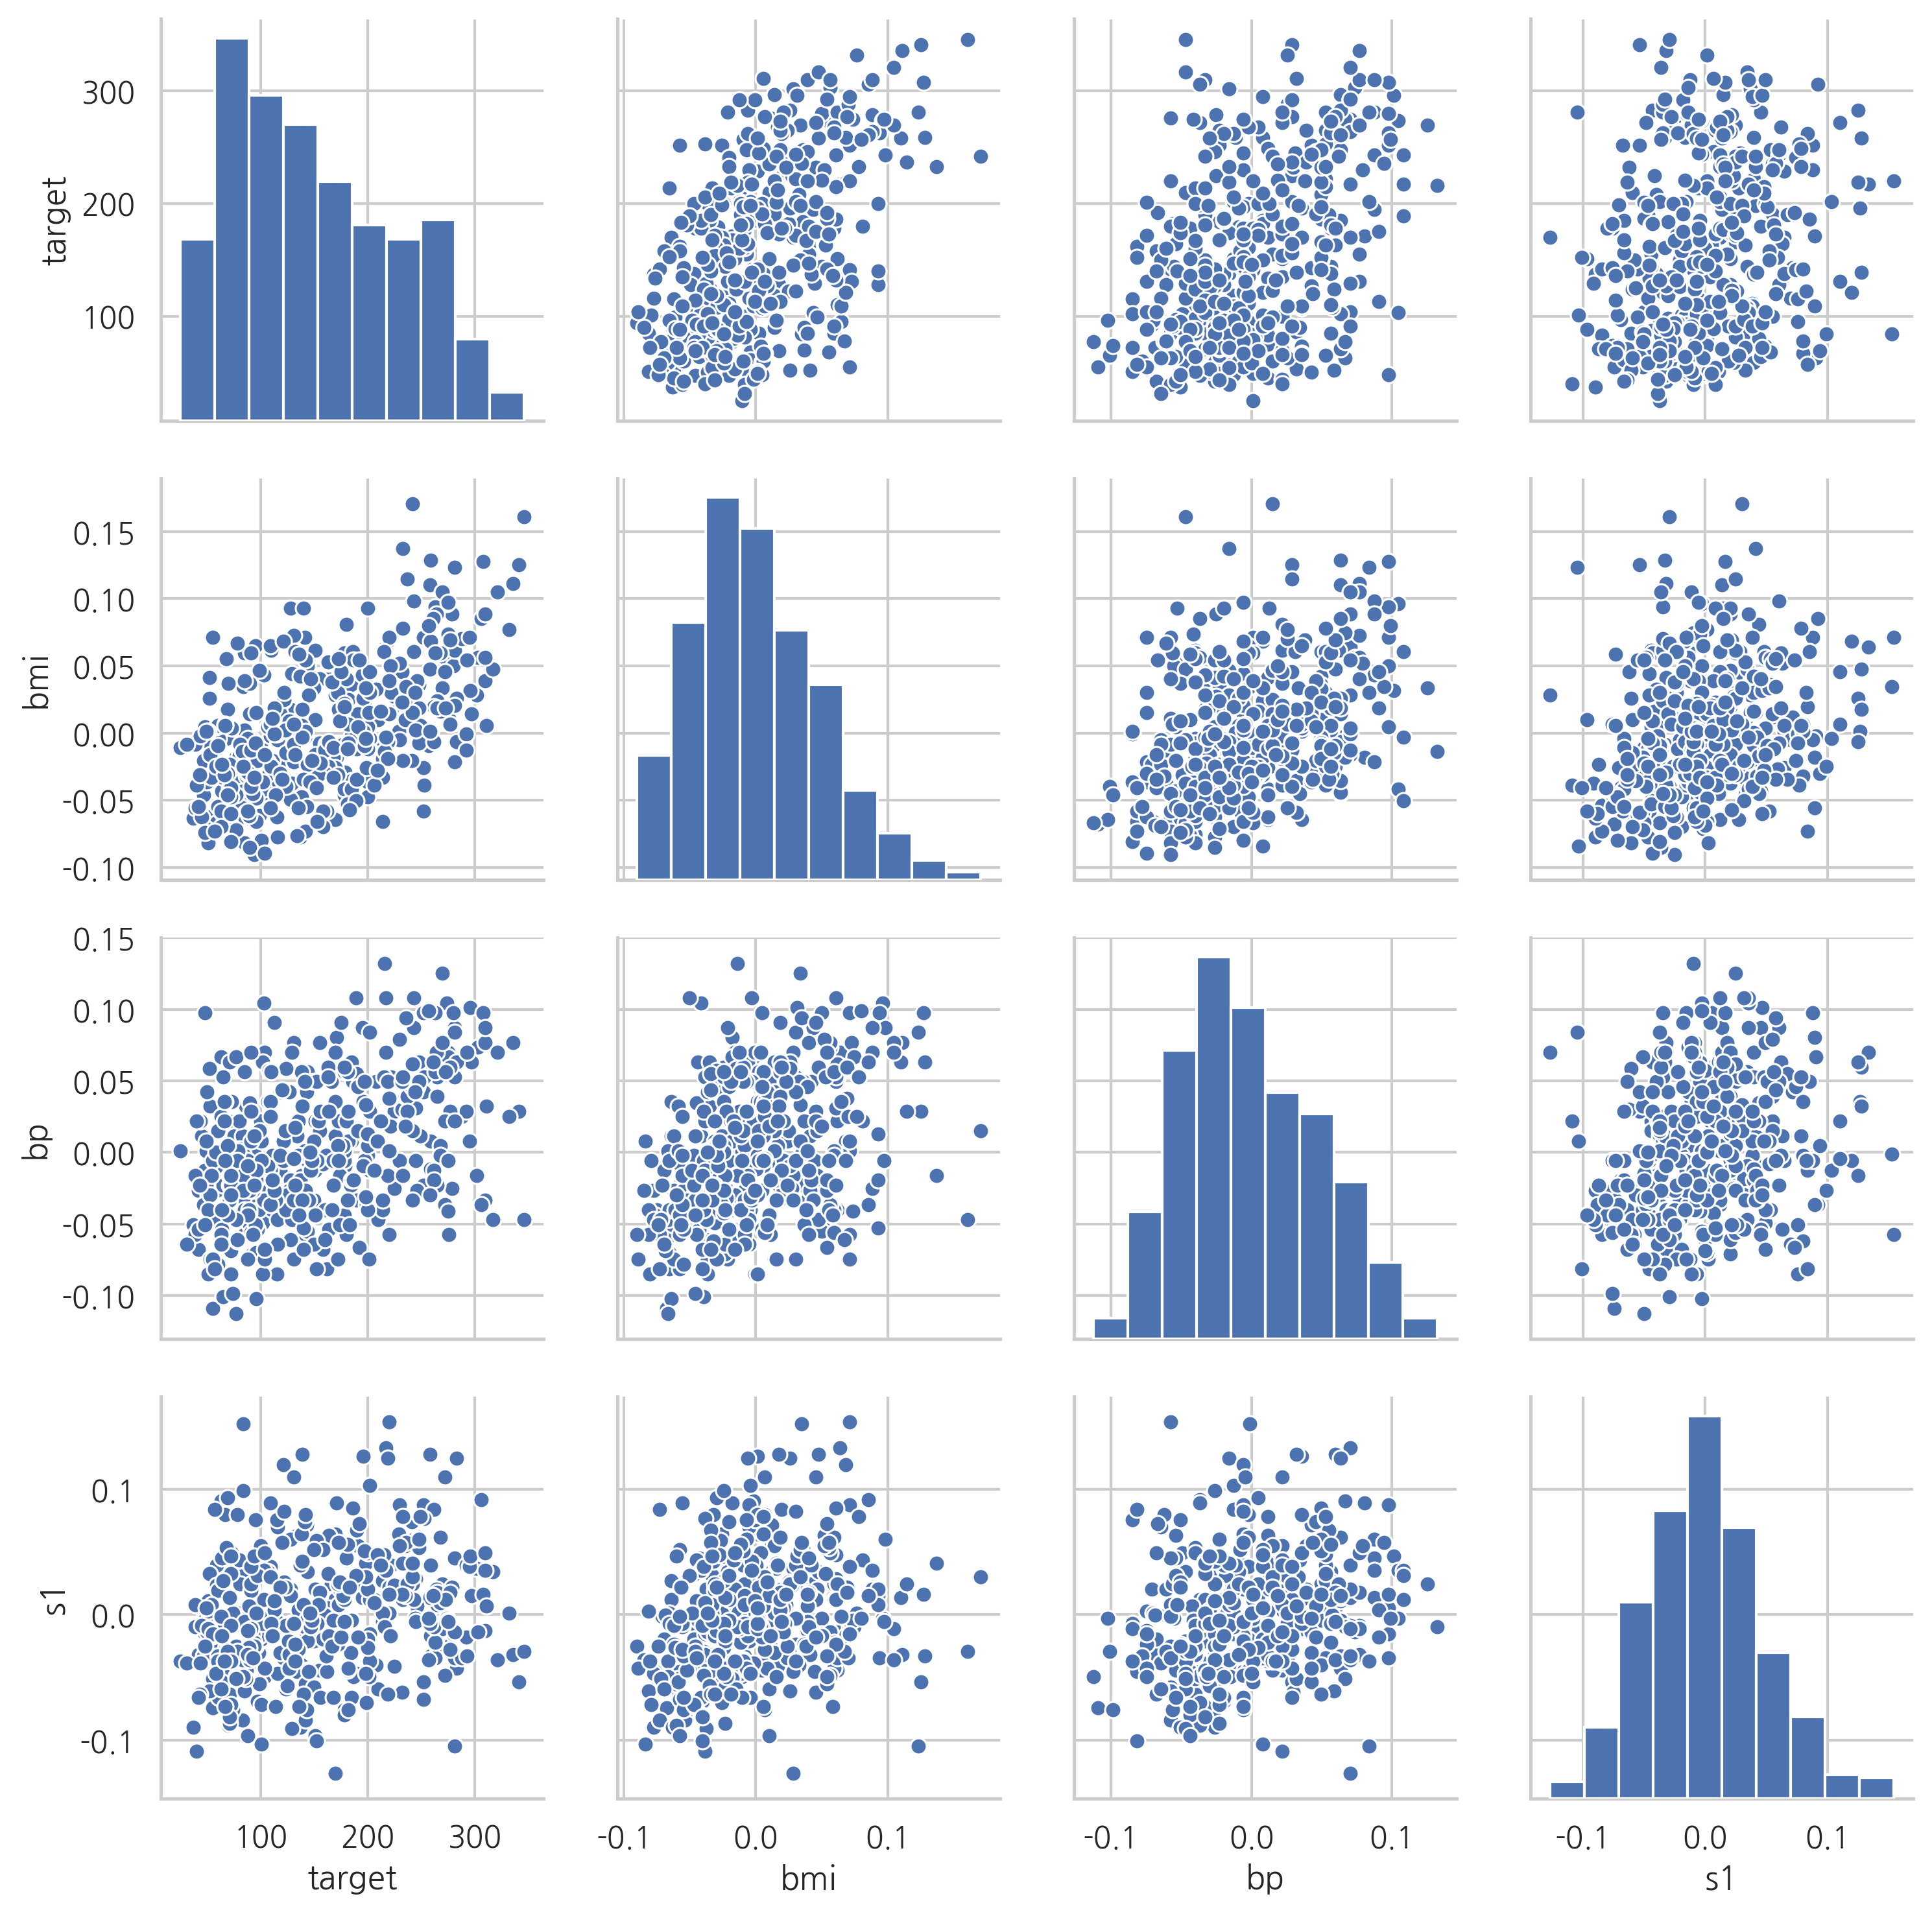

In [10]:
sns.pairplot(df[['target', 'bmi', 'bp', 's1']])
plt.show()

- bmi지수와 평균혈압이 종속변수인 당뇨병 진행도와 양의 상관관계를 가짐
- bmi지수와 평균혈압도 서로 양의 상관관계를 가짐
- 독립변수끼리 양의 상관관계를 가지는 것은 **다중공선성**이라고 함

#### 캘리포니아 주택가격 예측(연습문제 4.1.1)

        - MedInc        median income in block       
        - HouseAge      median house age in block      
        - AveRooms      average number of rooms       
        - AveBedrms     average number of bedrooms        
        - Population    block population        
        - AveOccup      average house occupancy        
        - Latitude      house block latitude        
        - Longitude     house block longitude  
        
        A block group is the smallest geographical unit for which the U.S.
        a block group typically has a population\nof 600 to 3,000 people

In [12]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()
dir(cal)

['DESCR', 'data', 'feature_names', 'target']

In [25]:
cal_df = pd.DataFrame(cal.data, columns=cal.feature_names)
cal_df['target'] = cal.target
cal_df.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894

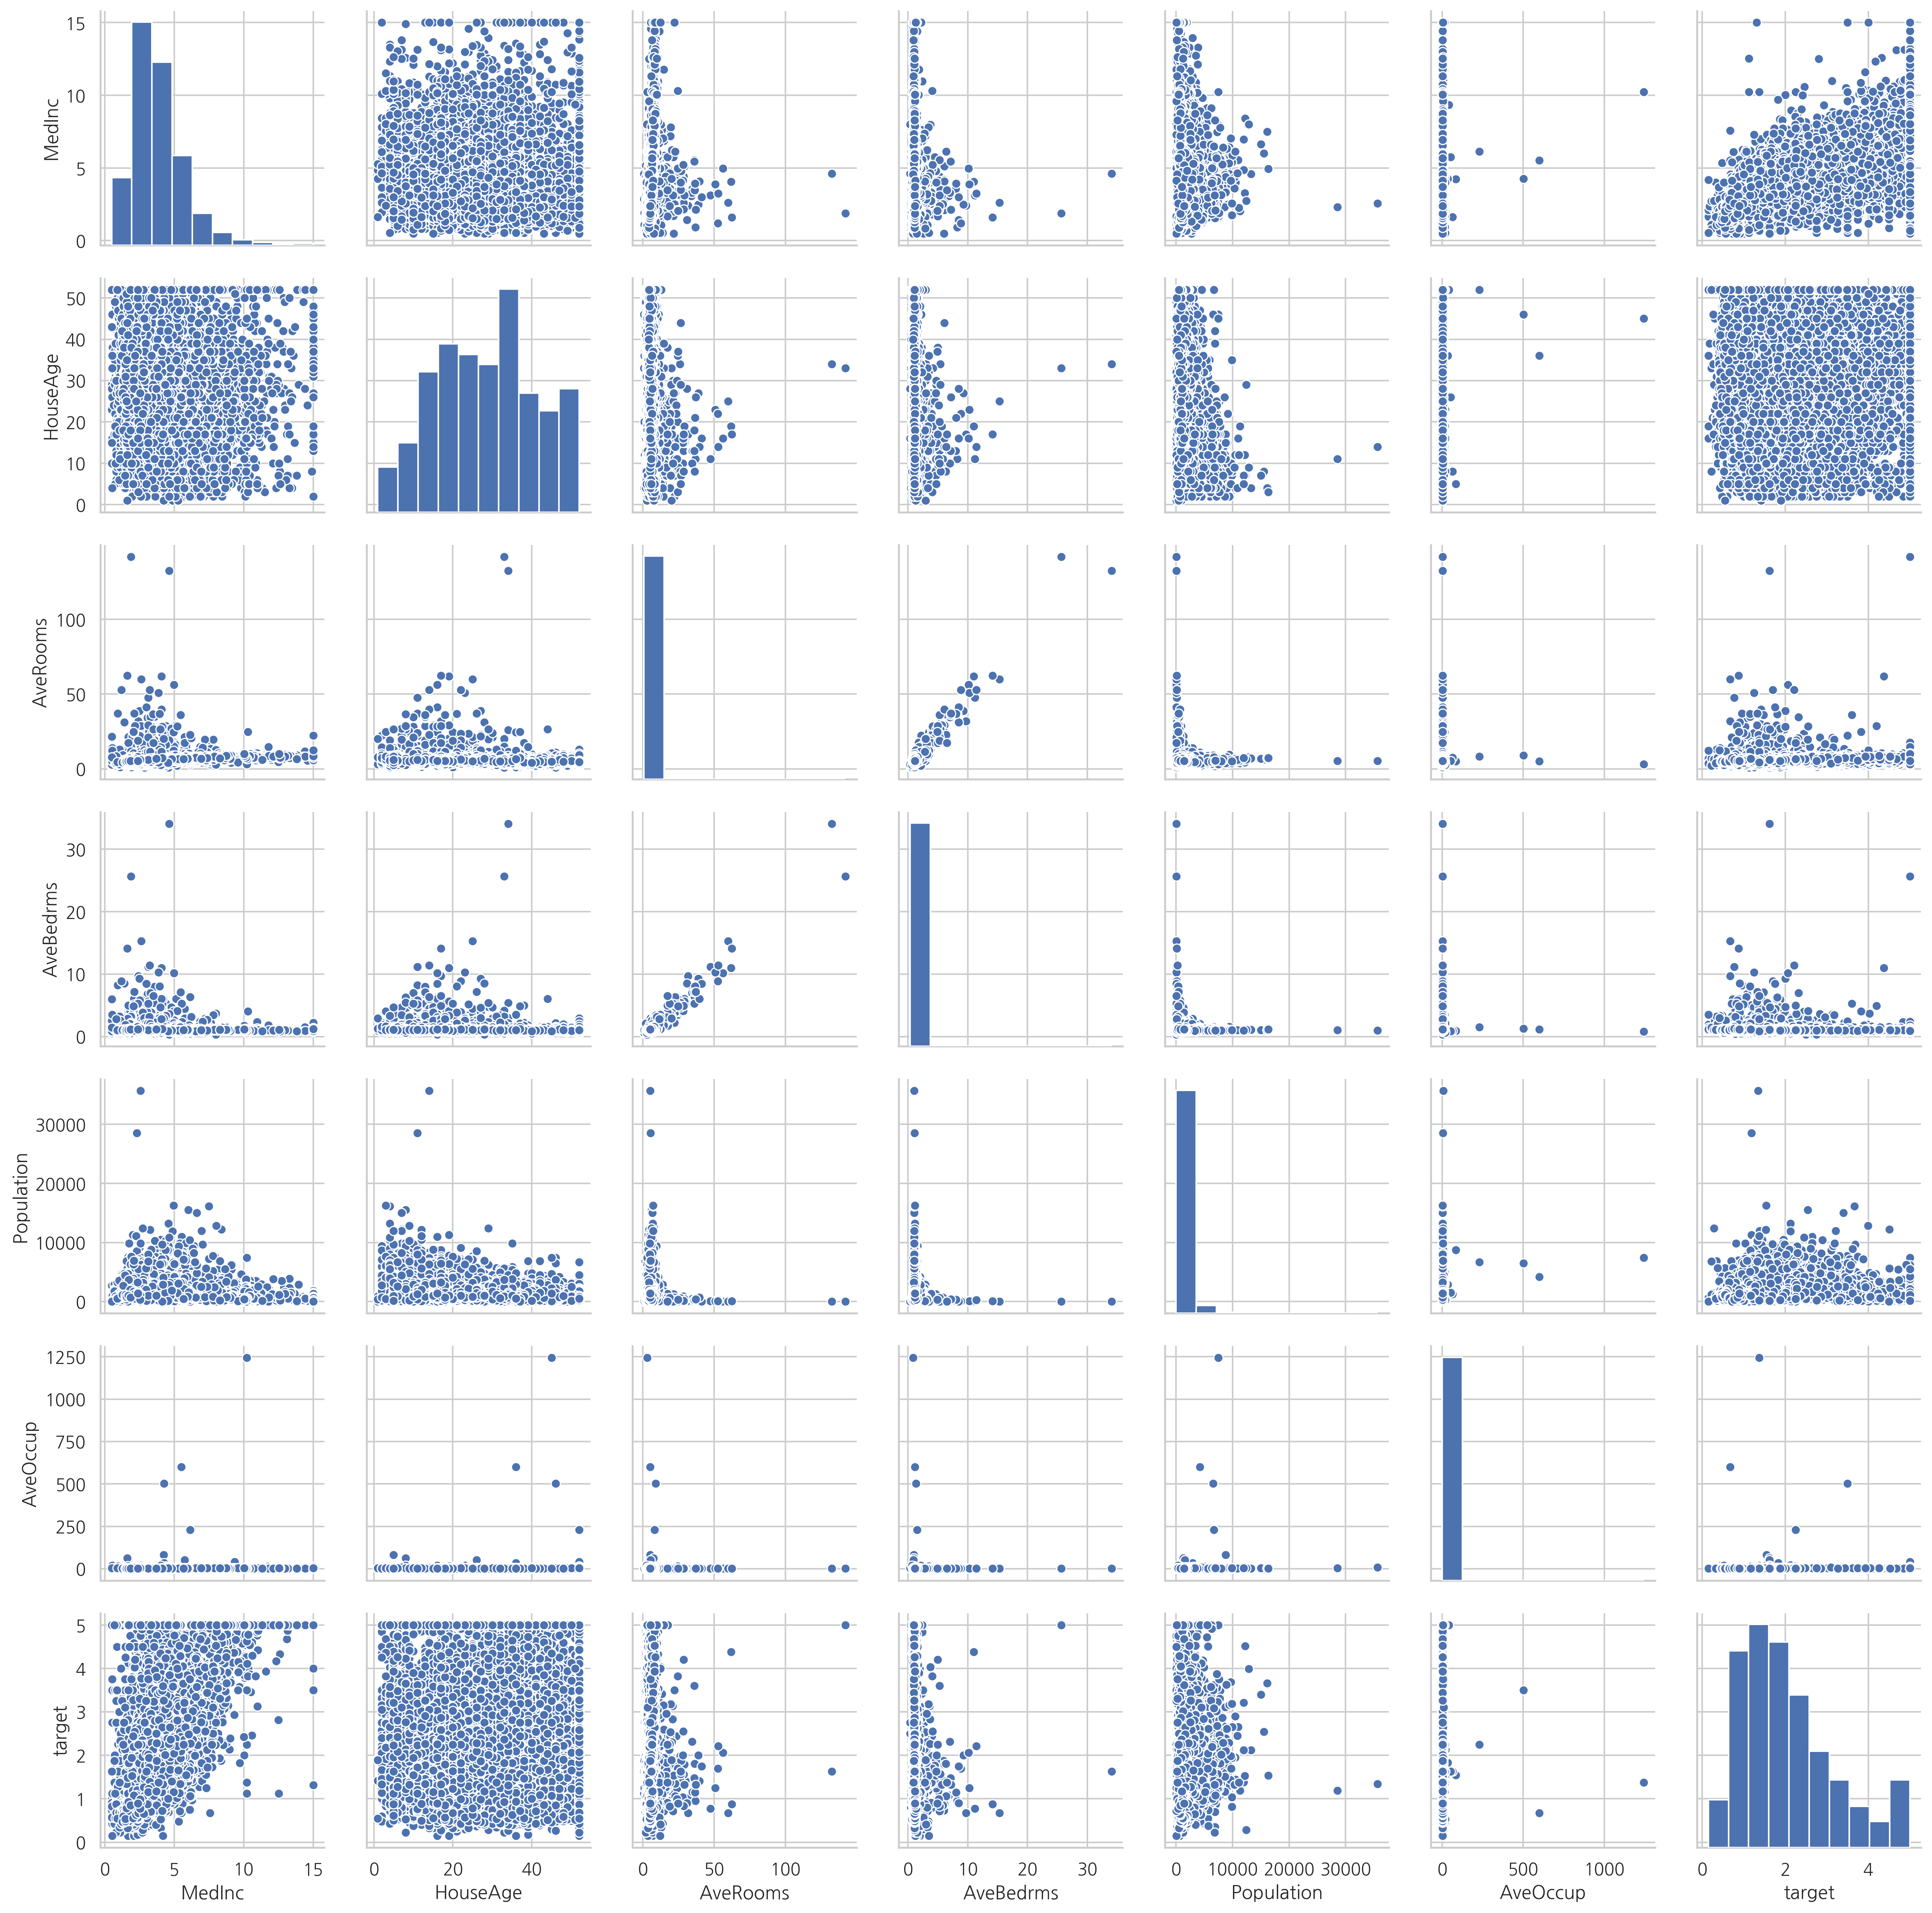

In [29]:
sns.pairplot(cal_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','target']])
plt.show()

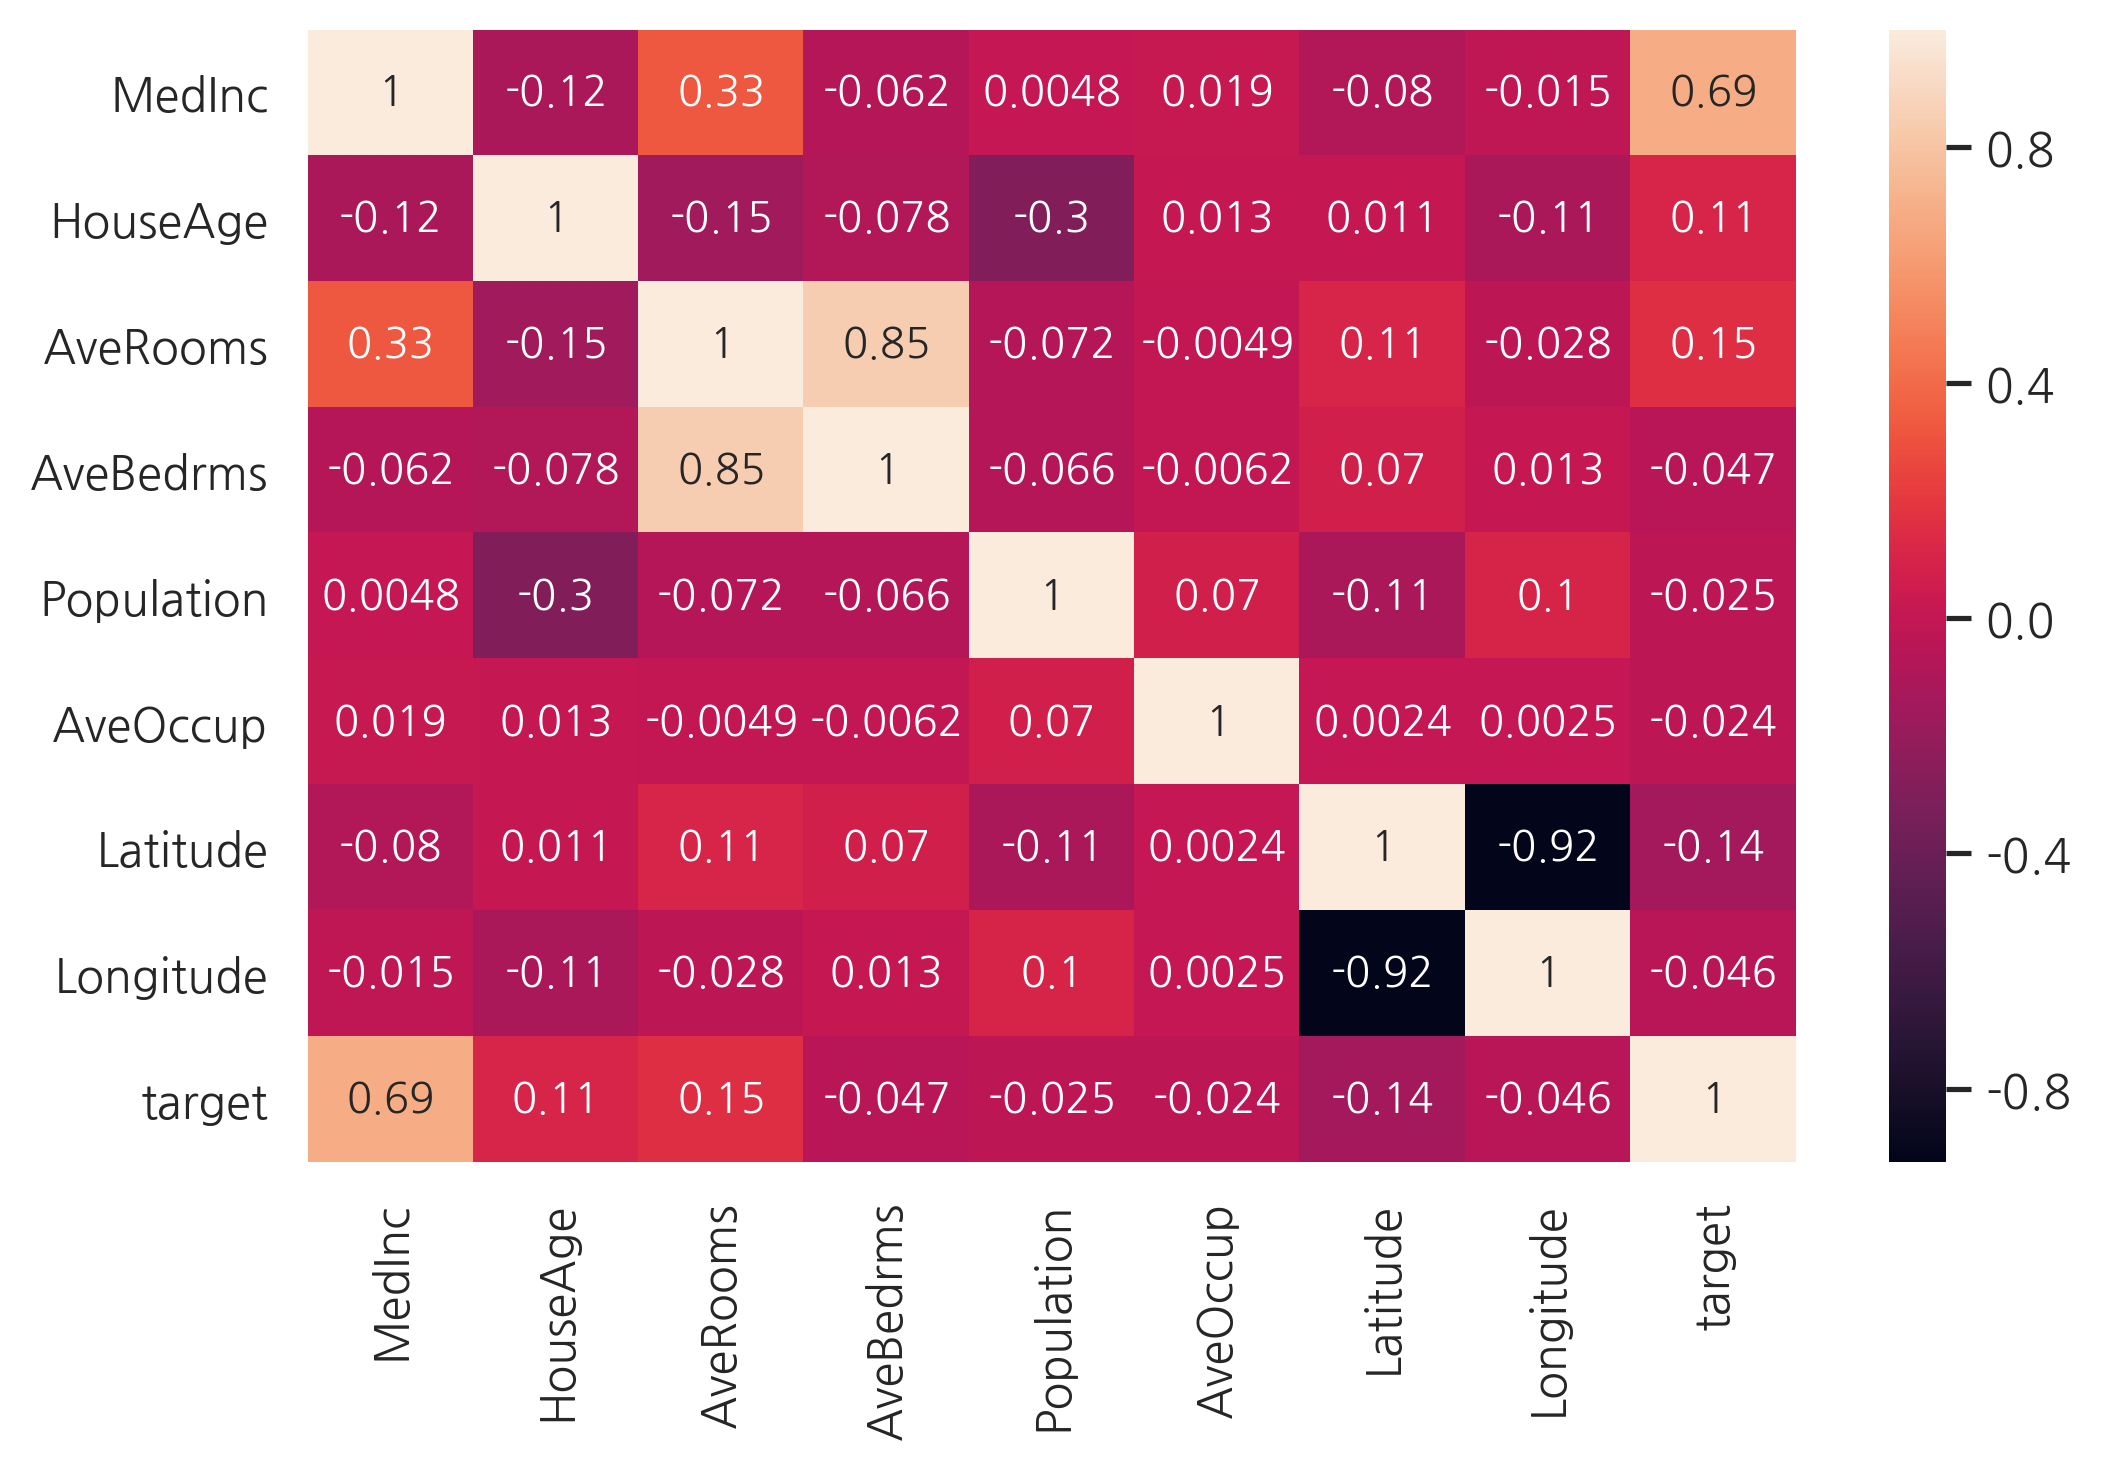

In [30]:
sns.heatmap(cal_df.corr(), annot=True)

- MedInc : 블럭 당 수입의 중앙값이 주택 가격에 가장 많은 영향을 미친다

### 선형회귀분석

#### Numpy

In [31]:
from sklearn.datasets import make_regression
bias = 100
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [41]:
X0

array([[ 0.23249456],
       [-0.03869551],
       [ 0.5505375 ],
       [ 0.50318481],
       [ 2.18697965],
       [-0.0731127 ],
       [-0.26788808],
       [-1.62743834],
       [ 0.53035547],
       [ 0.16938243],
       [-0.64691669],
       [ 0.51292982],
       [ 0.86888616],
       [ 0.87616892],
       [-0.10174587],
       [ 1.96710175],
       [ 1.23616403],
       [ 0.79280687],
       [-0.0126646 ],
       [-1.09491185],
       [ 1.04444209],
       [ 0.28558733],
       [ 0.59357852],
       [ 1.74481176],
       [-1.37311732],
       [-0.87785842],
       [ 0.90085595],
       [-0.11044703],
       [-0.07557171],
       [ 1.16033857],
       [-1.23005814],
       [ 0.74055645],
       [-0.29664115],
       [-1.85798186],
       [ 0.2135339 ],
       [-2.02220122],
       [ 0.37756379],
       [ 0.81095167],
       [ 1.2245077 ],
       [-0.22232814],
       [ 2.19069973],
       [-0.67124613],
       [ 0.4202822 ],
       [-1.07296862],
       [-1.14434139],
       [ 0

In [32]:
w

array(86.44794301)

In [33]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

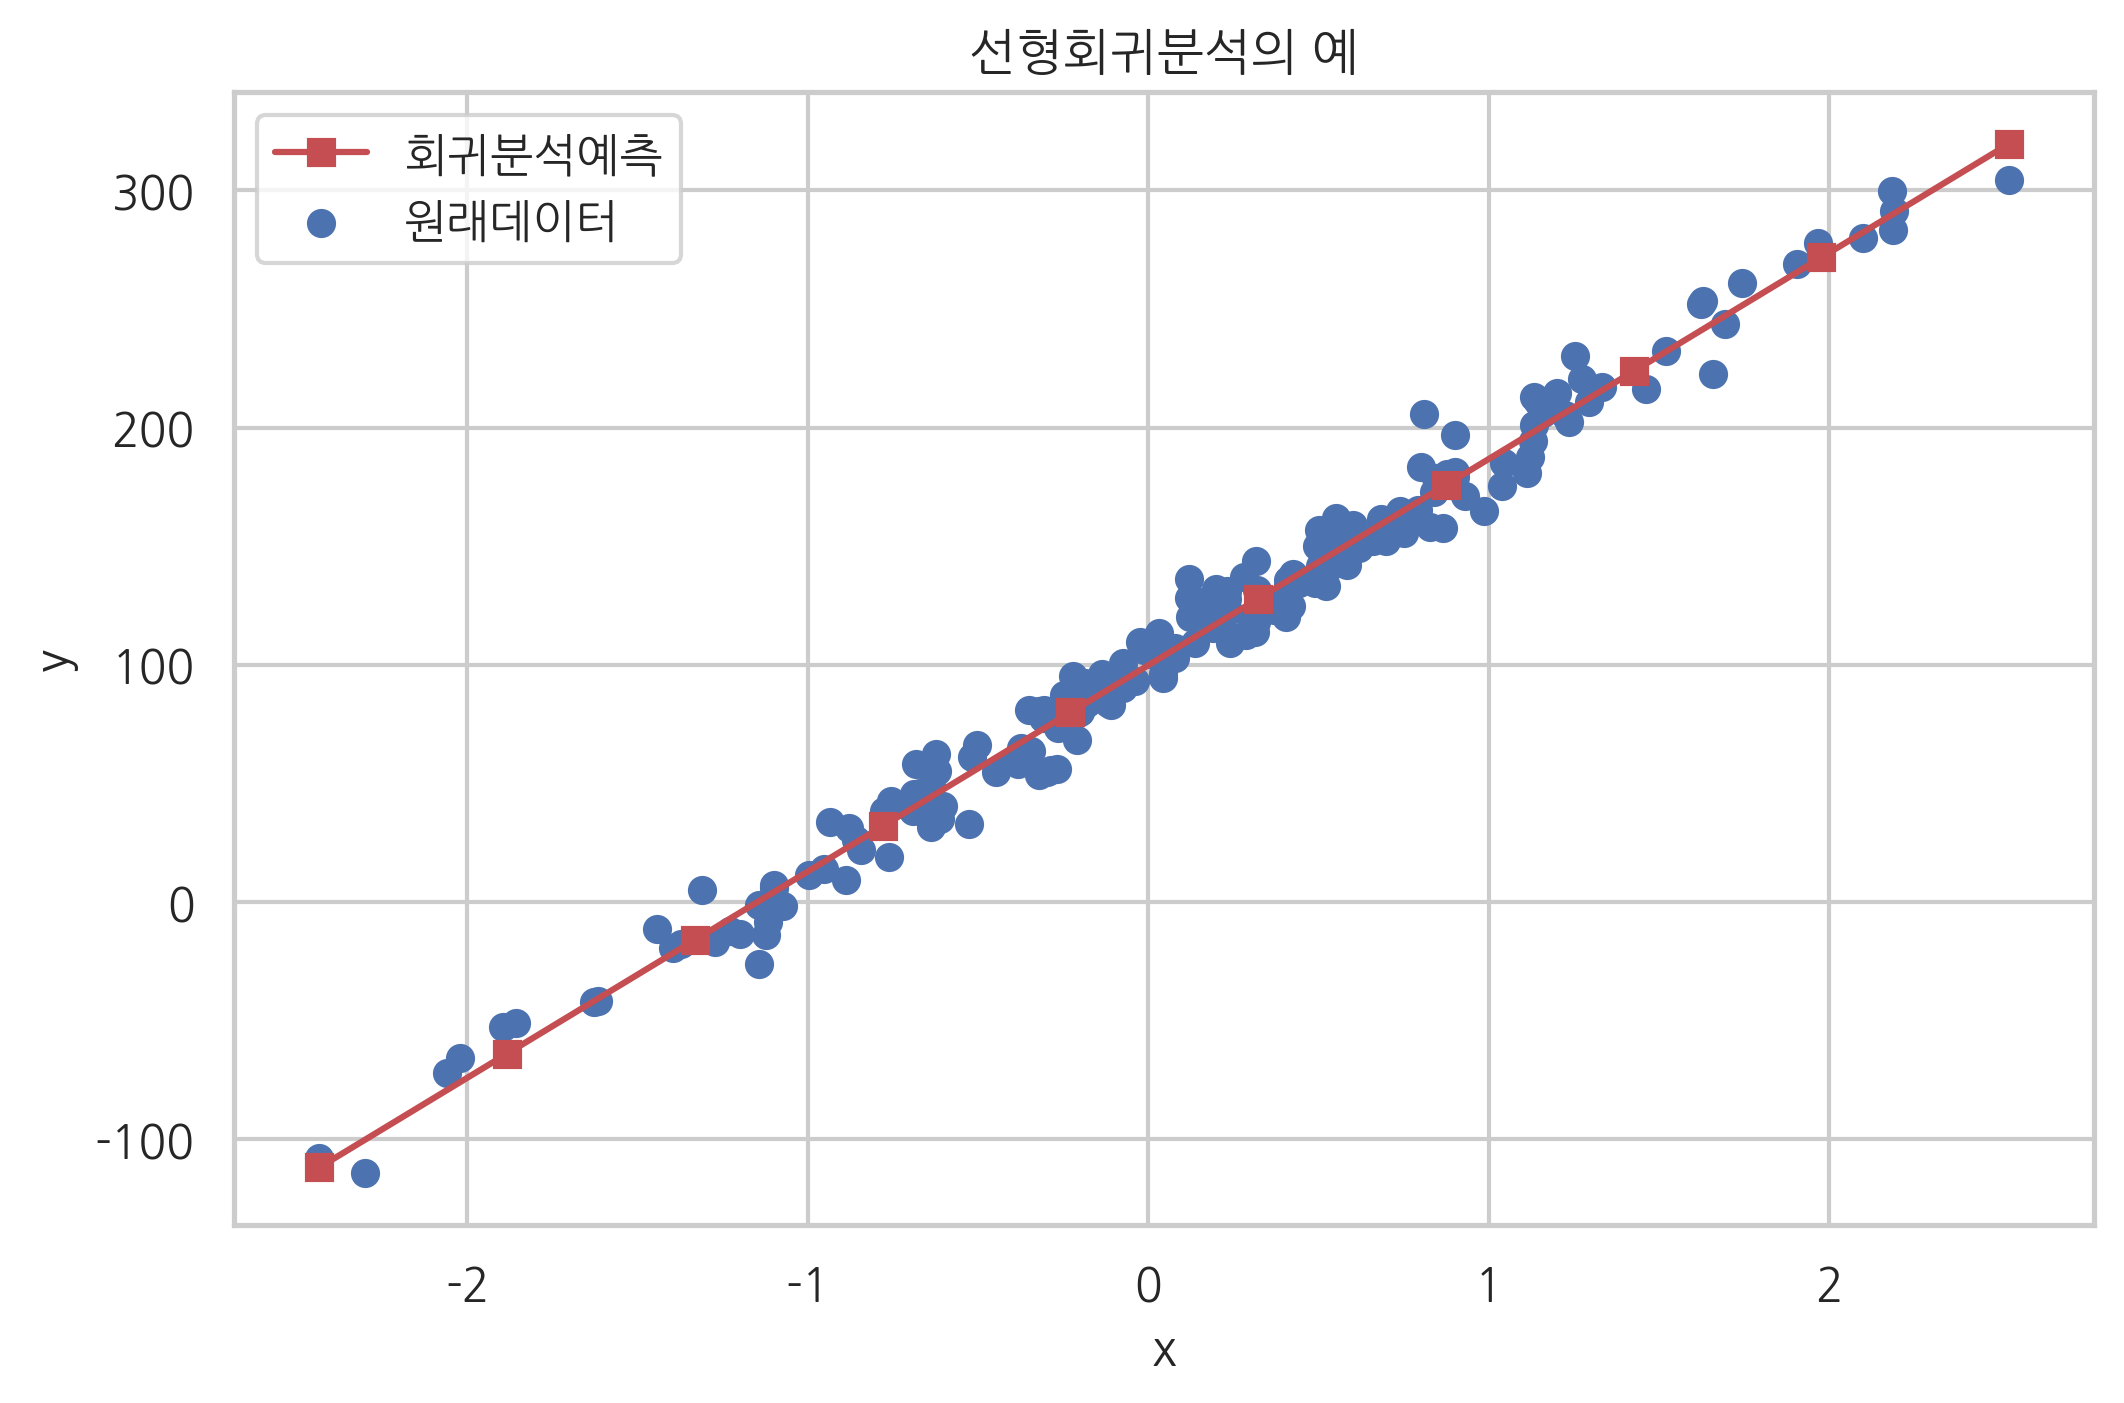

In [35]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = X_new @ w

plt.scatter(X0, y, label='원래데이터')
plt.plot(x_new, y_new, 'rs-', label='회귀분석예측')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형회귀분석의 예')
plt.legend()
plt.show()

#### scikit_learn

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)
# 추정된 상수항, 추정된 가중치 벡터

[99.79150869] [[86.96171201]]


In [39]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

#### statsmodels

 - `model = OLS(dfy, dfX)`
        - dfX : 독립변수만 있는 데이터 프레임. 상수항 포함
        - dfy : 종속변수만 있는 데이터 프레임

In [40]:
df = pd.DataFrame({'x': X0[:, 0], 'y': y[:, 0]})
df

x           y
0    0.232495  127.879017
1   -0.038696   93.032914
2    0.550537  161.857508
3    0.503185  141.692050
4    2.186980  283.260119
..        ...         ...
195 -0.172428   87.874277
196 -1.199268  -13.626664
197  1.462108  216.106619
198  1.131629  212.743149
199  0.495211  150.017589

[200 rows x 2 columns]

In [43]:
dfy = df[['y']]
dfX = sm.add_constant(df[['x']])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        14:06:55   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [53]:
result.params

const    99.791509
x        86.961712
dtype: float64

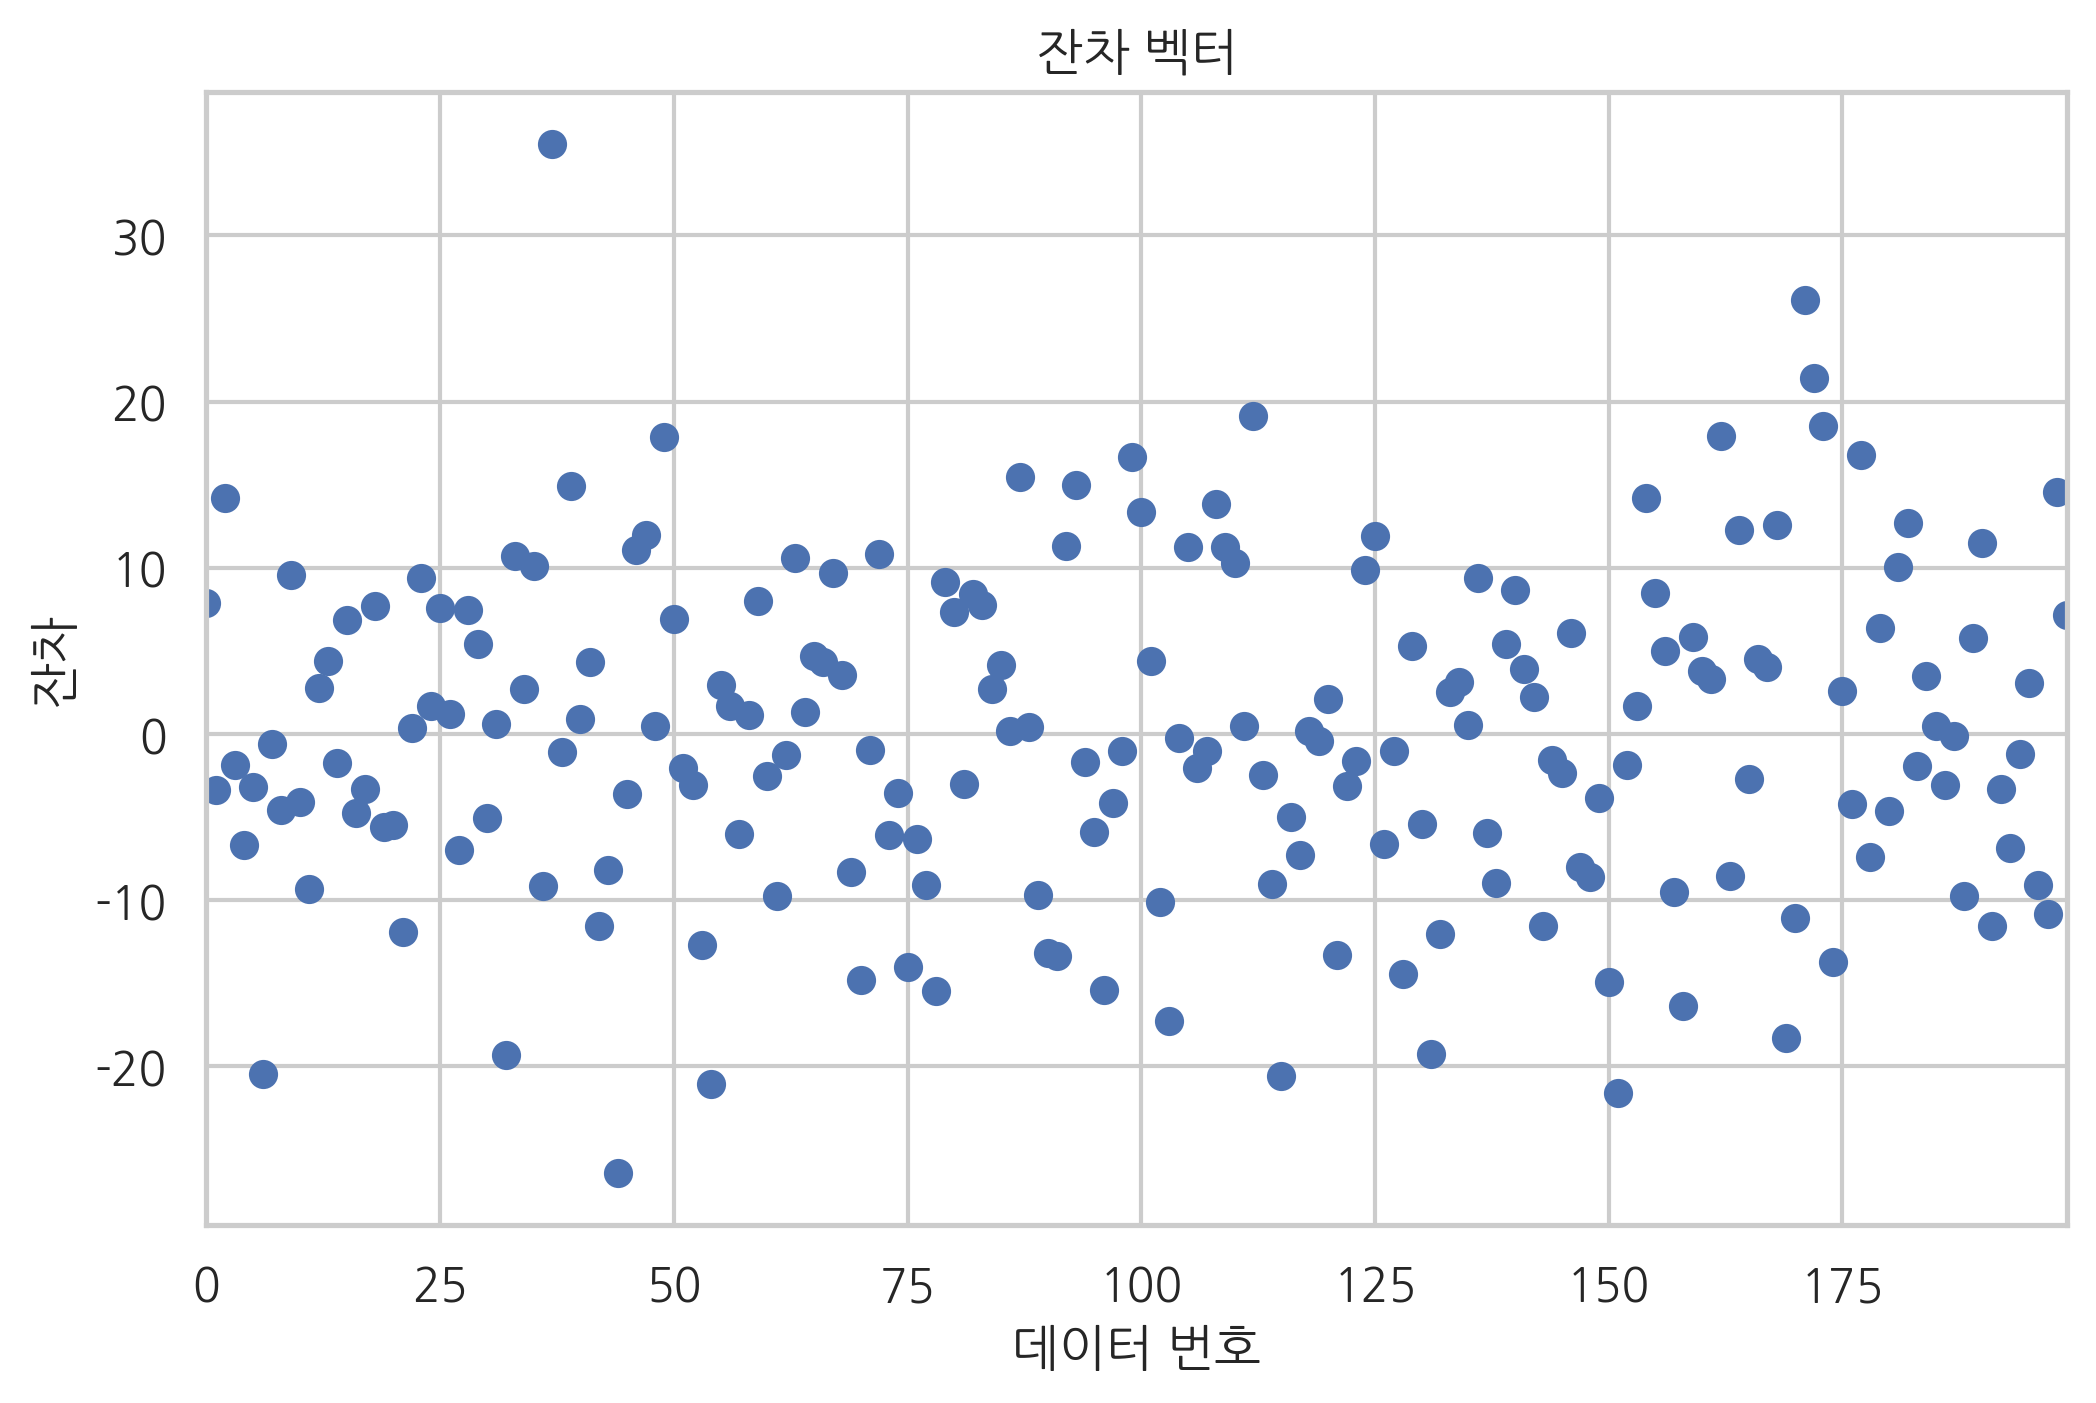

In [55]:
result.resid.plot(style='o')
plt.title('잔차 벡터')
plt.xlabel('데이터 번호')
plt.ylabel('잔차')
plt.show()

In [58]:
result.resid.sum()

3.637978807091713e-12

- `models = OLS.from_formula(formula, data=df)`
        - formula : 종속변수와 독립변수를 지정하는 문자열
        - data : 독립변수와 종속변수가 모두 포함된 데이터 프레임

In [45]:
model2 = sm.OLS.from_formula('y ~ x', data=df)
result2 = model2.fit()

In [47]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        14:07:08   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [50]:
result2.predict({'x': [-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [54]:
result2.params

Intercept    99.791509
x            86.961712
dtype: float64

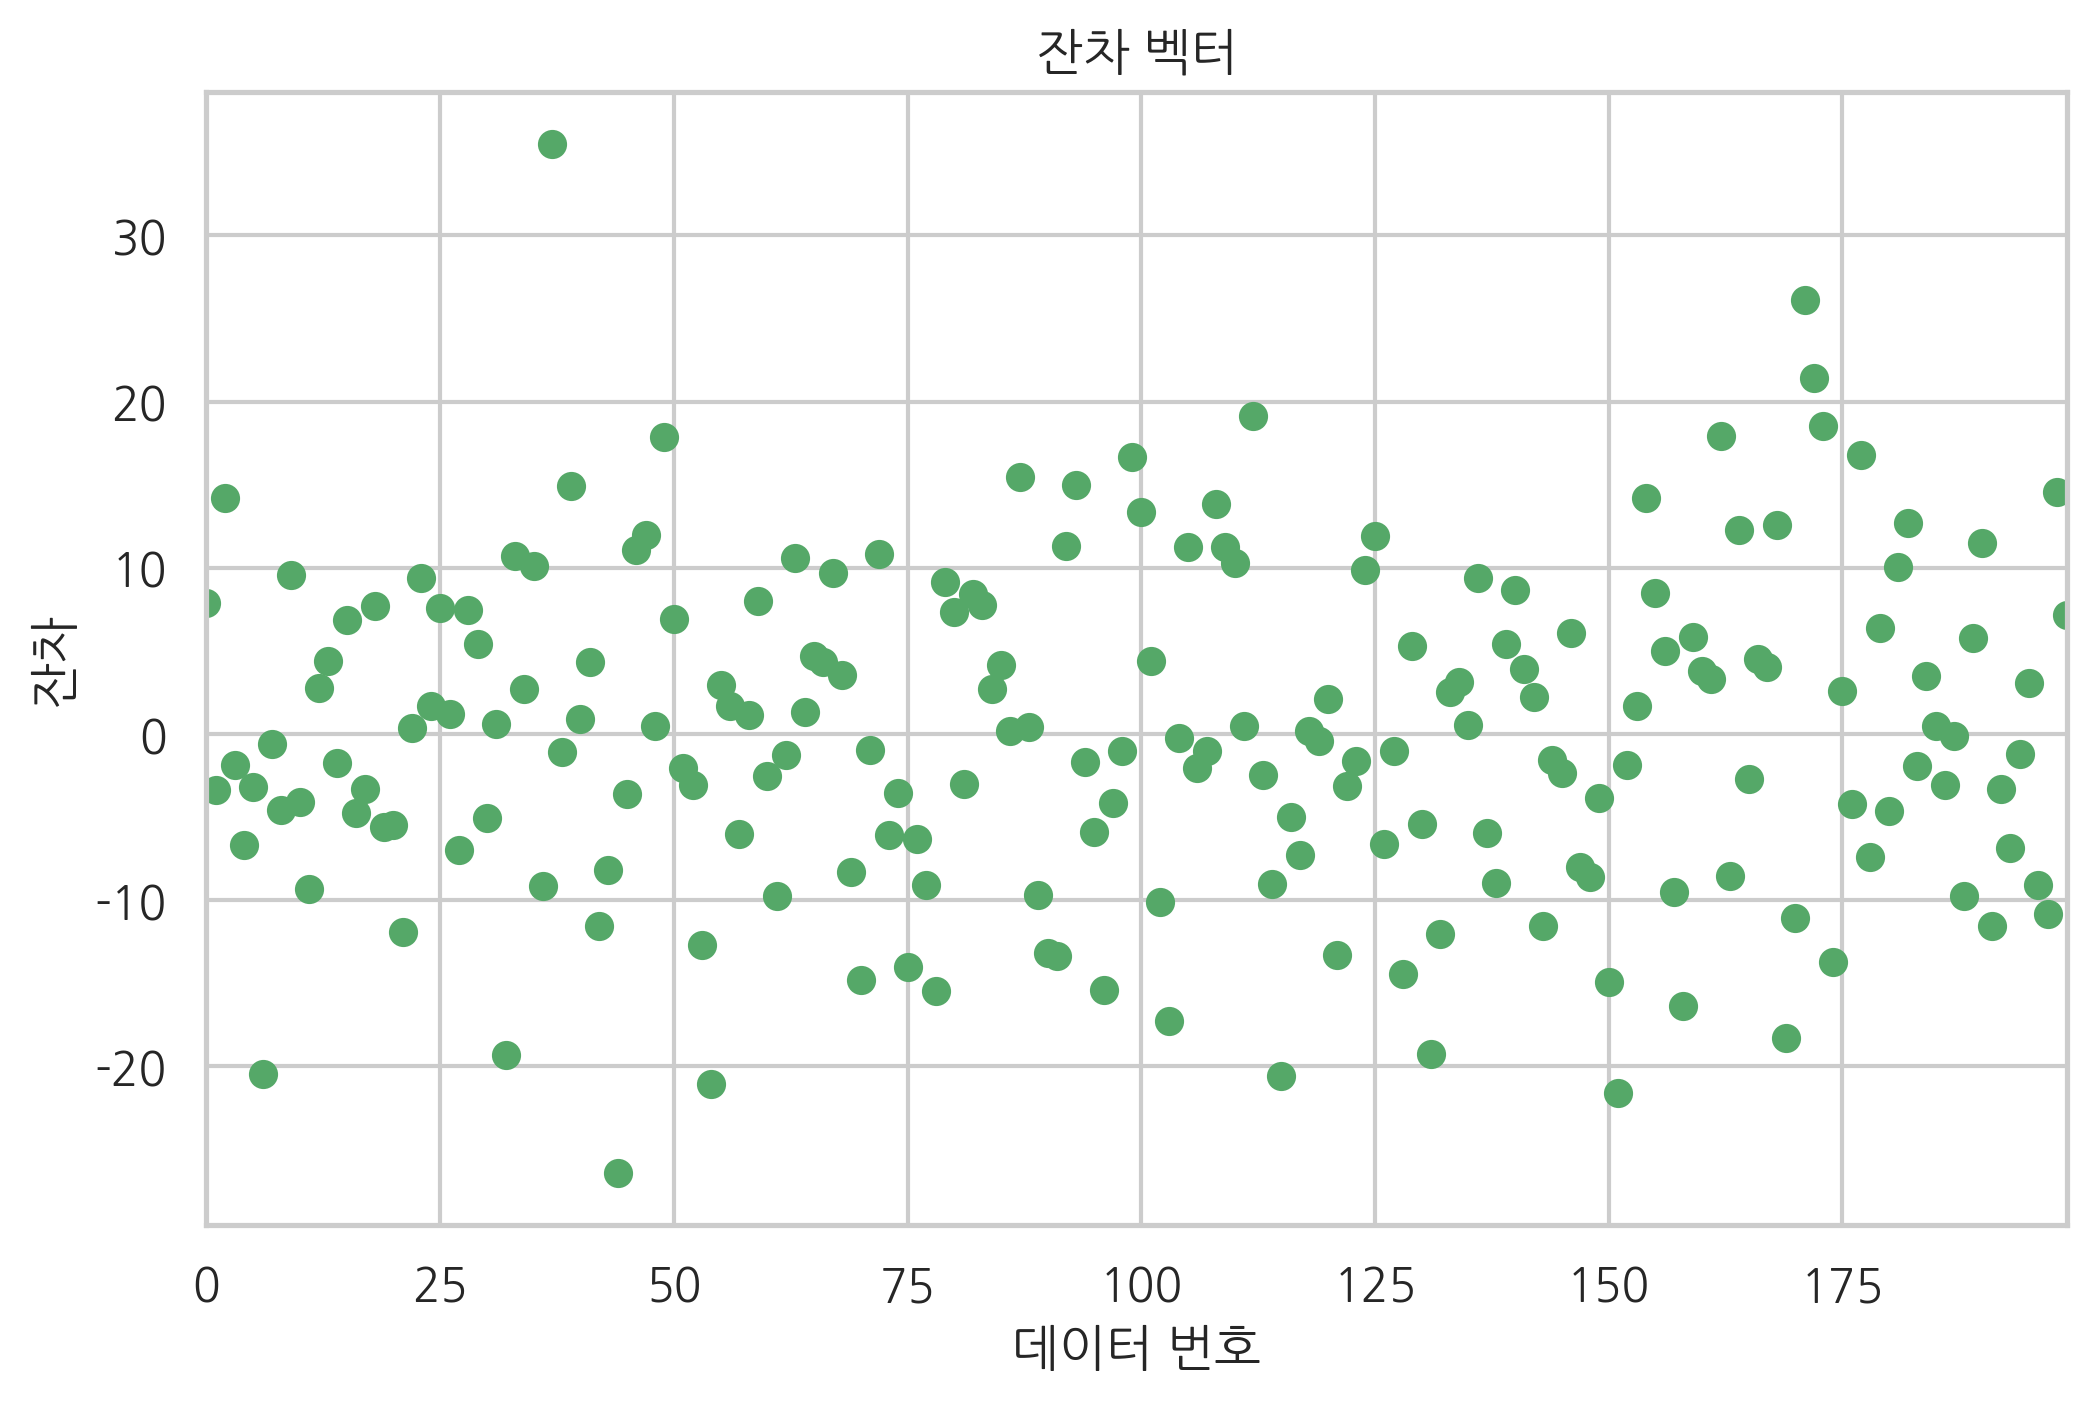

In [57]:
result2.resid.plot(style='o', c='g')
plt.title('잔차 벡터')
plt.xlabel('데이터 번호')
plt.ylabel('잔차')
plt.show()

In [59]:
result2.resid.sum()

3.7196912217041245e-12

In [61]:
result2.predict({'x': X0.mean()})

0    109.069351
dtype: float64

In [62]:
y.mean()

109.06935068170773

#### - 보스턴 집값 예측

In [64]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        14:13:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [68]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=['target'])

model_diabetes2 = sm.OLS(dfy, dfX)
result_diabetes2 = model_diabetes2.fit()
print(result_diabetes2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.83e-62
Time:                        14:26:26   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0